In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
car_figure_data = pickle.load(open('car_experiments.pkl', 'rb'))
f16_figure_data = pickle.load(open('f16_experiments.pkl', 'rb'))

Text(0.5, 1.0, '(d) Visualized F16 Region')

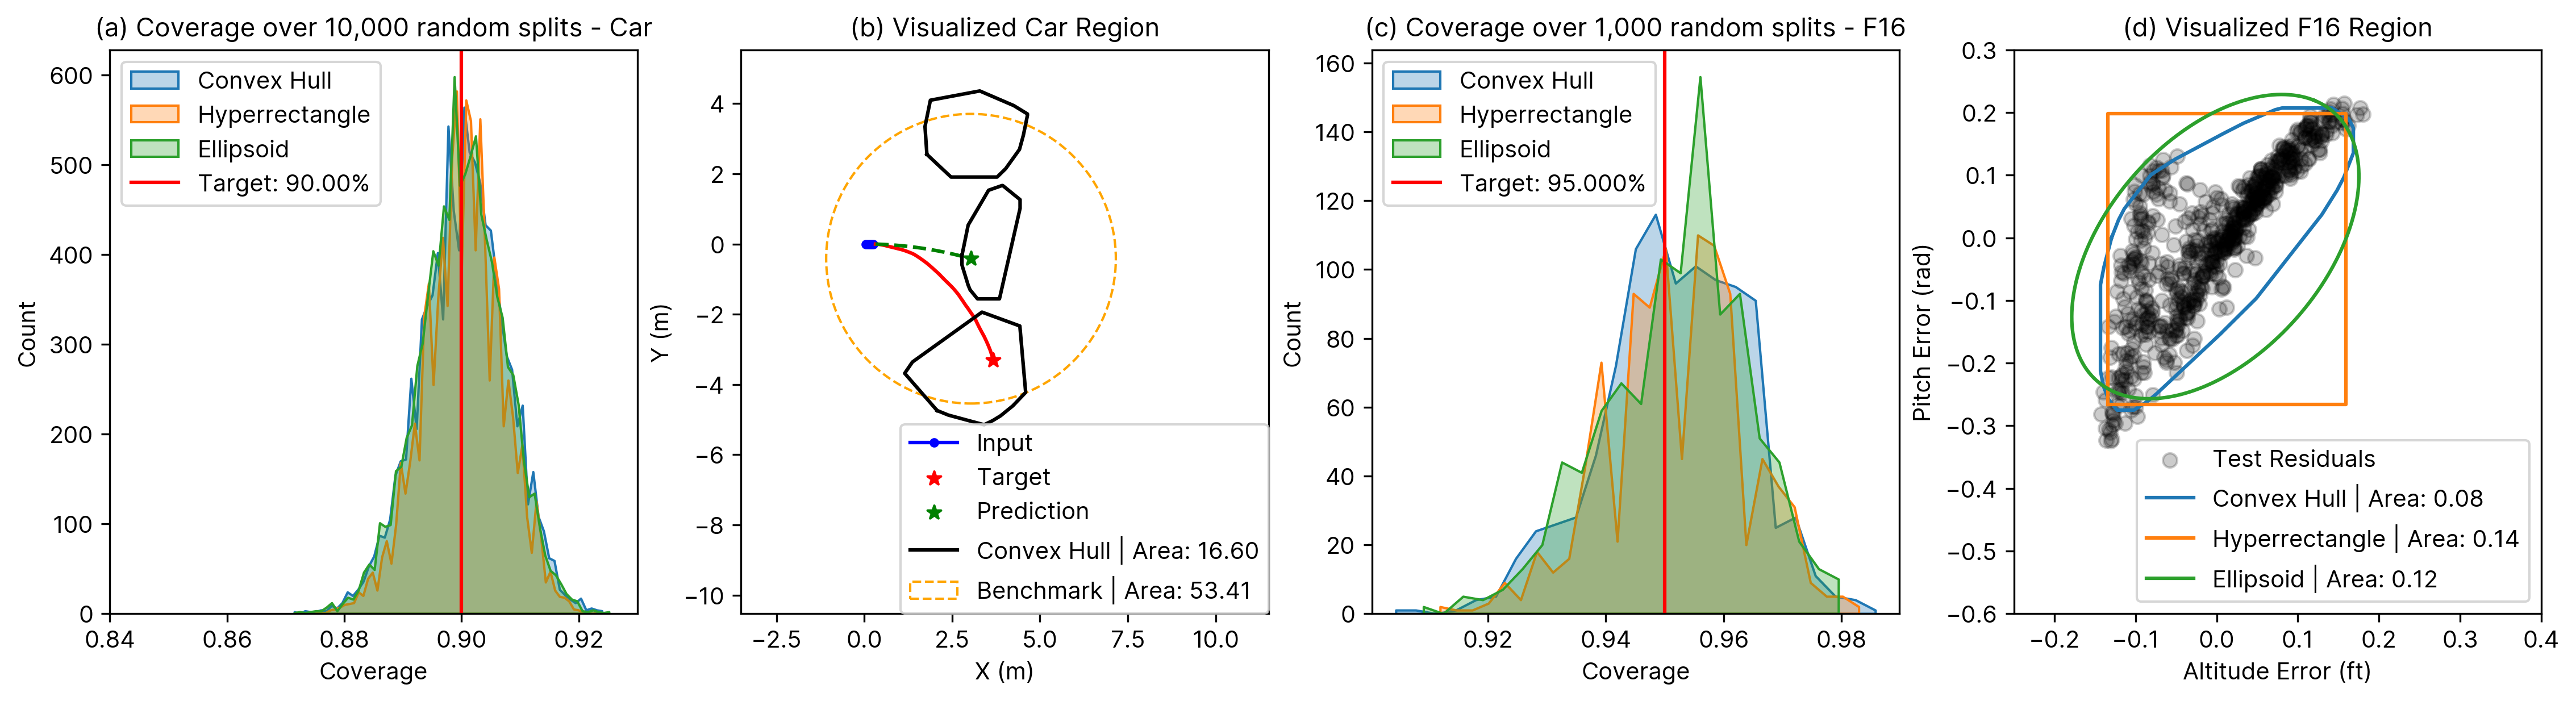

In [3]:
fig = plt.figure(figsize=(15, 4), constrained_layout=True)
from matplotlib import gridspec
gs = gridspec.GridSpec(1,8, figure=fig)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:4])
ax3 = plt.subplot(gs[0, 4:6])
ax4 = plt.subplot(gs[0, 6:])

# Car Experiment Coverage
sns.histplot(car_figure_data['cvxcoverages'], element="poly", label="Convex Hull", alpha=0.3, ax=ax1)
sns.histplot(car_figure_data['hrcoverages'], element="poly", label="Hyperrectangle", alpha=0.3, ax=ax1)
sns.histplot(car_figure_data['ellcoverages'], element="poly", label="Ellipsoid", alpha=0.3, ax=ax1)
ax1.axvline(x=car_figure_data['DELTA'], color="red", label=f"Target: {car_figure_data['DELTA']:.2%}")
ax1.legend(loc='upper left')
ax1.set_xlim([0.84, 0.93])
ax1.set_xlabel("Coverage")
ax1.set_title("(a) Coverage over 10,000 random splits - Car")

# Car Experiment Conformal Region
prediction = car_figure_data['prediction'][:,:2]
input = car_figure_data['input']
output = car_figure_data['output']
ax2.plot(input[:, 0], input[:, 1], 'b.-', label='Input')
ax2.plot(output[:, 0], output[:, 1], 'r-')
ax2.scatter(output[-1, 0], output[-1, 1], color='r', marker='*', label='Target')
error = np.linalg.norm(prediction - output, axis=1)
ax2.plot(prediction[:, 0], prediction[:, 1], 'g--')
ax2.scatter(prediction[-1, 0], prediction[-1, 1], color='g', marker='*', label='Prediction')
for i, shape_template in enumerate(car_figure_data['cvxpcr'].shapes):
    if i == 0:
        shape_template.plot(ax2, offset_coords=prediction[-1], label=f"Convex Hull | Area: {car_figure_data['cvxpcr'].volume():.2f}")
    else:
        shape_template.plot(ax2, offset_coords=prediction[-1])
ax2.set_title(f'(b) Visualized Car Region')
# Plot benchmark CP region
bcp_cir = plt.Circle(prediction[-1], car_figure_data['benchmark_bound'], color='orange', linestyle='--', fill=False, label=f'Benchmark | Area: {np.pi*car_figure_data["benchmark_bound"]**2:.2f}')
ax2.add_patch(bcp_cir)
ax2.legend(loc='lower right', borderaxespad=0.)
ax2.set_xlabel("X (m)")
ax2.set_ylabel("Y (m)")
ax2.set_xlim([-4, 12])
ax2.set_ylim([-11, 6])
ax2.set_aspect('equal', adjustable='datalim')

# F16 Experiment Coverage
sns.histplot(f16_figure_data['cvxcoverages'], element="poly", label="Convex Hull", alpha=0.3, ax=ax3)
sns.histplot(f16_figure_data['hrcoverages'], element="poly", label="Hyperrectangle", alpha=0.3, ax=ax3)
sns.histplot(f16_figure_data['ellcoverages'], element="poly", label="Ellipsoid", alpha=0.3, ax=ax3)
ax3.axvline(x=f16_figure_data['DELTA'], color="red", label=f"Target: {f16_figure_data['DELTA']:.3%}")
ax3.legend(loc='upper left')
ax3.set_xlabel("Coverage")
ax3.set_title("(c) Coverage over 1,000 random splits - F16")

# F16 Experiment Conformal Region
Z_test = f16_figure_data['Z_test']
cvxpcr = f16_figure_data['cvxpcr']
hrpcr = f16_figure_data['hrpcr']
ellpcr = f16_figure_data['ellpcr']
ax4.scatter(Z_test[:, 0], Z_test[:, 1], alpha=0.2, color="black", label=f"Test Residuals")
for i in range(len(hrpcr.shapes)):
    cvxpcr.shapes[i].plot(ax=ax4, label=f"Convex Hull | Area: {cvxpcr.shapes[i].volume():.2f}", color="C0")
    hrpcr.shapes[i].plot(ax=ax4, label=f"Hyperrectangle | Area: {hrpcr.shapes[i].volume():.2f}", color="C1")
    ellpcr.shapes[i].plot(ax=ax4, label=f"Ellipsoid | Area: {ellpcr.shapes[i].volume():.2f}", color="C2")

ax4.set_xlabel("Altitude Error (ft)")
ax4.set_ylabel("Pitch Error (rad)")
ax4.set_xlim([-0.25, 0.4])
ax4.set_ylim([-0.6, 0.3])
ax4.legend(loc='lower right')
ax4.set_title(f"(d) Visualized F16 Region")